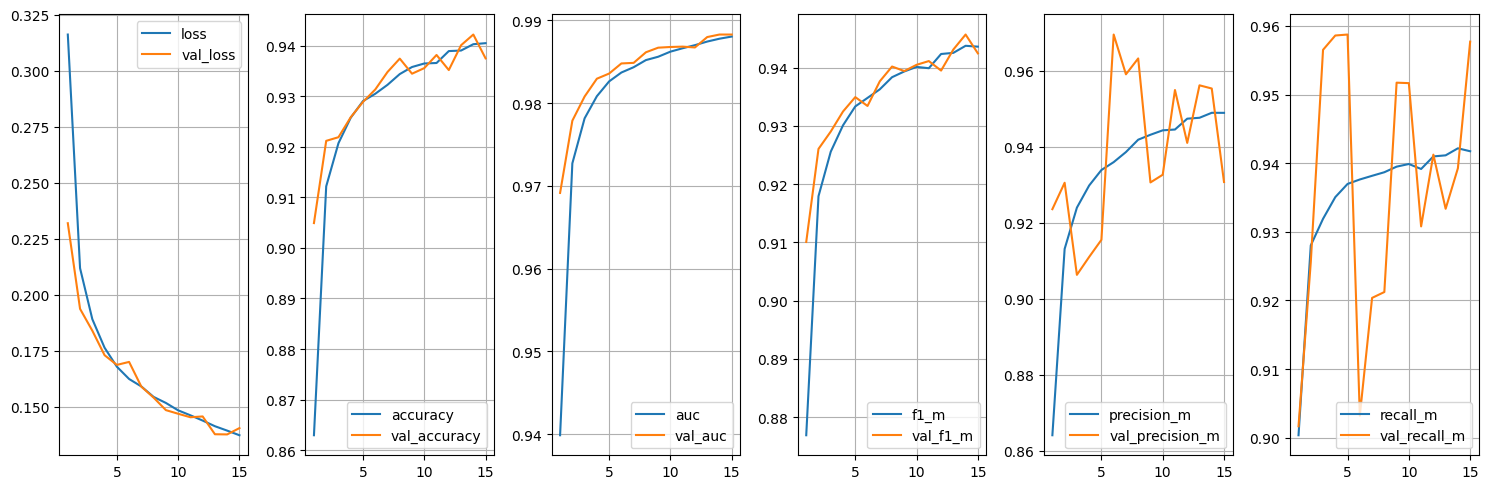

2598/2598 [==============================] - 6s 2ms/step - loss: 0.1374 - accuracy: 0.9405 - auc: 0.9880 - f1_m: 0.9436 - precision_m: 0.9489 - recall_m: 0.9417 - val_loss: 0.1405 - val_accuracy: 0.9375 - val_auc: 0.9883 - val_f1_m: 0.9424 - val_precision_m: 0.9307 - val_recall_m: 0.9577
Test accuracy: 0.9401
Test AUC: 0.9886
Test F1: 0.9448
Test Recall: 0.9325
Test Precision: 0.9608



In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from utils import PlotLearning

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Import des données
url = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
data = pd.read_csv(url, delimiter=';')

# Préparation des données
X = data.drop(columns=['Satisfaction', 'id'])
y = data['Satisfaction']

# Encoder les variables catégorielles
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création du modèle
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', f1_m, precision_m, recall_m])

# Entraînement du modèle
callbacks_list = [PlotLearning()]
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

# Évaluation du modèle
_, test_accuracy, test_auc, f1, recall, precision = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}\nTest AUC: {test_auc:.4f}\nTest F1: {f1:.4f}\nTest Recall: {recall:.4f}\nTest Precision: {precision:.4f}\n")

In [34]:
from neural_net import NeuralNetMLP
nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=60, eta=0.005, minibatch_size=100, shuffle=True, seed=1)

In [35]:
nn.fit(X_train, y_train, X_test, y_test)

60/60 | Cost: 33212.02 | Train/Valid Acc.: 93.32%/93.24% 

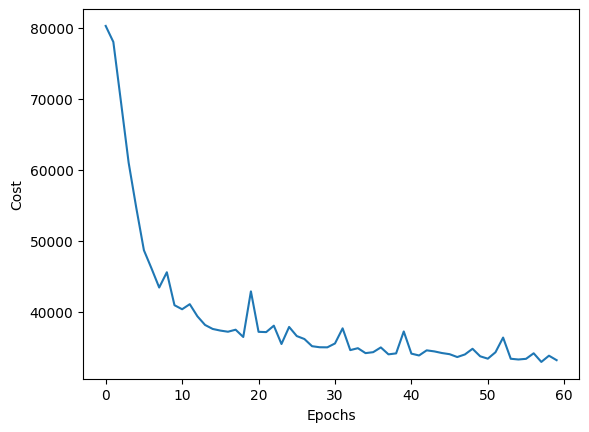

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

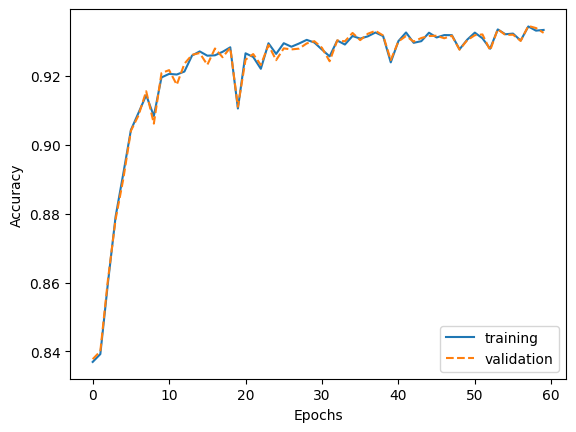

In [44]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()